https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [1]:
%reload_kedro

2023-10-07 16:47:19,402 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: C:\Users\Dushku\PycharmProjects\monash-datahack-2023
2023-10-07 16:47:19,524 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-10-07 16:47:19,544 - kedro.framework.hooks.manager - INFO - Registered hooks from 1 installed plugin(s): kedro-telemetry-0.2.5
2023-10-07 16:47:19,592 - kedro.extras.extensions.ipython - INFO - ** Kedro project Monash datahack 2023
2023-10-07 16:47:19,592 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\kedro\framework\context\context.py:344: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\base', 'C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


In [2]:
df = catalog.load('encoded_data')

2023-10-07 16:47:19,597 - kedro.io.data_catalog - INFO - Loading data from `encoded_data` (CSVDataSet)...


In [3]:
df.head()

,y,Jurisdiction_encoded,Sub-stream,Category_encoded,Type_encoded,Management_encoded,Fate_encoded,ds_encoded
0,4039,0,3,1,7,3,0,14
1,0,0,3,1,7,4,3,14
2,0,0,2,2,5,4,3,14
3,0,0,3,2,5,4,3,14
4,0,0,1,2,5,4,3,14


In [4]:
df.columns

Index(['y', 'Jurisdiction_encoded', 'Sub-stream', 'Category_encoded',
       'Type_encoded', 'Management_encoded', 'Fate_encoded', 'ds_encoded'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36851 entries, 0 to 36850
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   y                     36851 non-null  int64
 1   Jurisdiction_encoded  36851 non-null  int64
 2   Sub-stream            36851 non-null  int64
 3   Category_encoded      36851 non-null  int64
 4   Type_encoded          36851 non-null  int64
 5   Management_encoded    36851 non-null  int64
 6   Fate_encoded          36851 non-null  int64
 7   ds_encoded            36851 non-null  int64
dtypes: int64(8)
memory usage: 2.2 MB


In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
X = df.loc[:, df.columns != 'y']
y = df['y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [9]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1177451.5887


In [10]:
reg.score(X_test, y_test)

0.5082455688586754

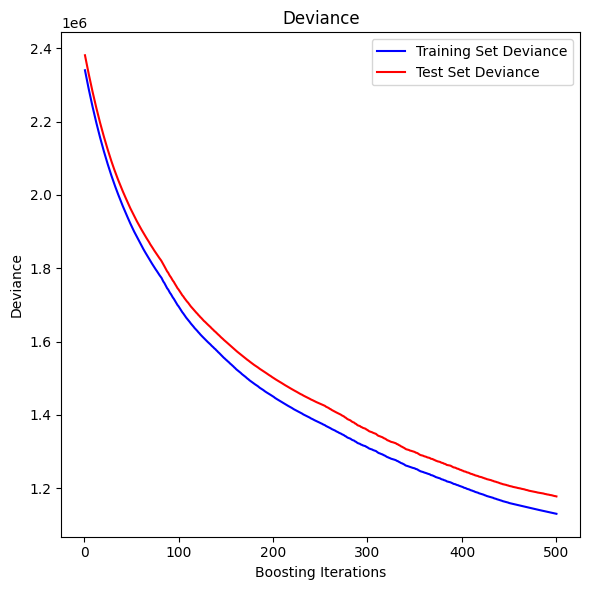

In [21]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()